# Exercici 1

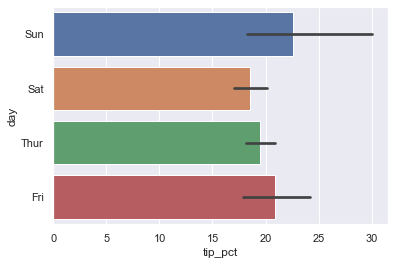

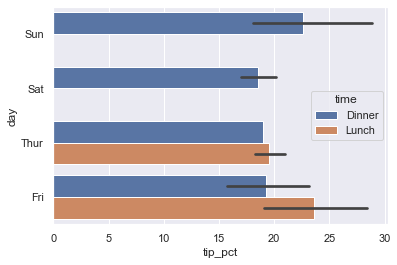

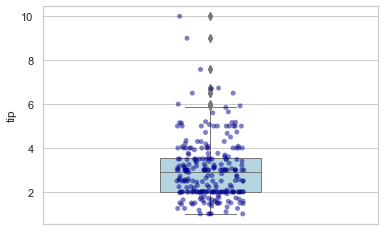

In [29]:
tips = pd.read_csv('tips.csv', sep = ',', encoding = 'utf-8')
tips.head()
tips.shape
tips.ndim
tips.columns
tips.dtypes
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
plt.show()
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()
sns.set(style="darkgrid")
tips.describe()
round(tips.describe(include='all'), 3)
tips.isnull().sum()/len(tips)
round((tips['tip']).describe(), 3)
(tips['tip']).median()
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5)

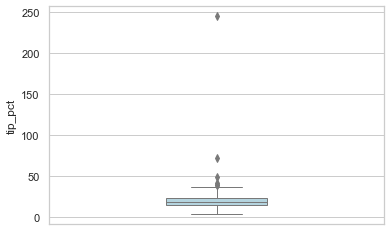

In [30]:
tips.dtypes
sns.boxplot(y="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);

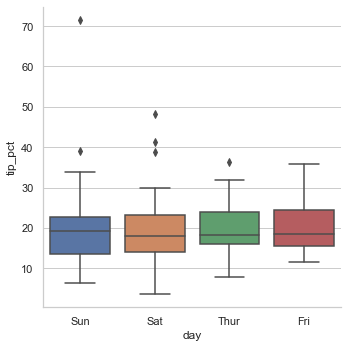

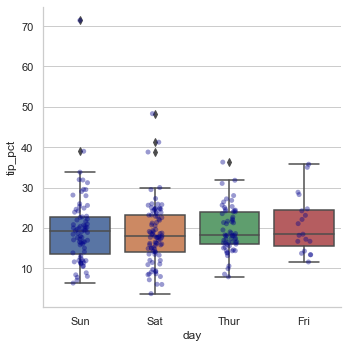

In [31]:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

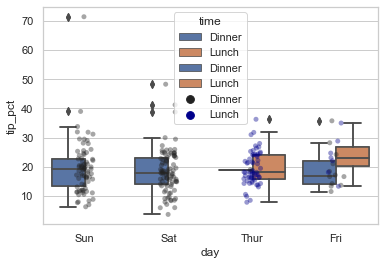

In [32]:
sns.boxplot(x='day', y='tip_pct', hue='time', 
               data=tips[tips.tip_pct < 245]);
sns.boxplot(x='day', y='tip_pct', hue = 'time',
               data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

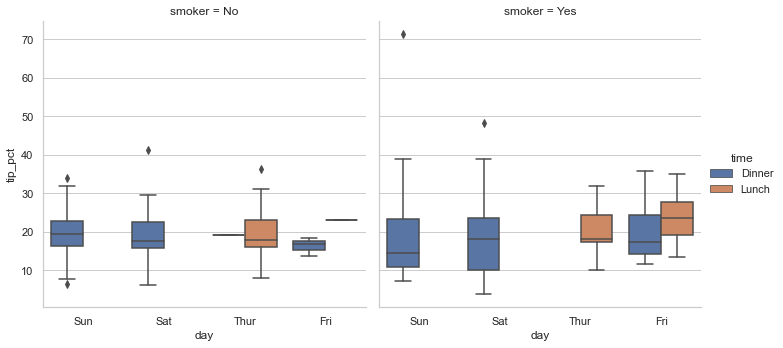

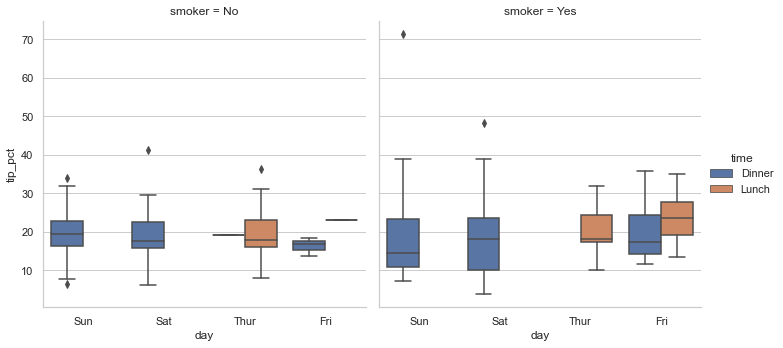

In [33]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

# Exercici 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

movies = pd.read_csv('movies.dat', sep='::', header=None, engine='python')
movies.columns=['ID','Titol','Genere']
print(movies.head())
print(movies.shape)
print(movies.ndim)
print(movies.columns)
print(movies.dtypes)
movies['Any'] = movies['Titol'].str[-6:]
movies['Titol'] = movies['Titol'].str[:-6]
movies['Any'] = movies['Any'].str.replace('(','')
movies['Any'] = movies['Any'].str.replace(')','')
movies['Any'] = movies['Any'].astype(int)
movies = movies.join(movies['Genere'].str.get_dummies('|'))
movies['numero'] = 1
print(movies.head())

   ID                               Titol                        Genere
0   1                    Toy Story (1995)   Animation|Children's|Comedy
1   2                      Jumanji (1995)  Adventure|Children's|Fantasy
2   3             Grumpier Old Men (1995)                Comedy|Romance
3   4            Waiting to Exhale (1995)                  Comedy|Drama
4   5  Father of the Bride Part II (1995)                        Comedy
(3883, 3)
2
Index(['ID', 'Titol', 'Genere'], dtype='object')
ID         int64
Titol     object
Genere    object
dtype: object
   ID                         Titol                        Genere   Any  \
0   1                    Toy Story    Animation|Children's|Comedy  1995   
1   2                      Jumanji   Adventure|Children's|Fantasy  1995   
2   3             Grumpier Old Men                 Comedy|Romance  1995   
3   4            Waiting to Exhale                   Comedy|Drama  1995   
4   5  Father of the Bride Part II                         Comedy  

[503, 283, 105, 251, 1200, 211, 127, 1603, 68, 44, 343, 114, 106, 471, 276, 492, 143, 68]


([<matplotlib.patches.Wedge at 0x2d09930bcd0>,
 [Text(1.0667224456883484, 0.26852043472456383, 'Action'),
  Text(0.8875671624860398, 0.6497880670468487, 'Adventure'),
  Text(0.7486981549385636, 0.8058852727228553, 'Animation'),
  Text(0.5973832374314006, 0.9236521356203206, "Children's"),
  Text(-0.15052658451982034, 1.0896521221714743, 'Comedy'),
  Text(-0.8110050598610645, 0.7431492399779139, 'Crime'),
  Text(-0.9224788704100146, 0.5991934025396669, 'Documentary'),
  Text(-1.0595310282332404, -0.29562476251324493, 'Drama'),
  Text(-0.5074451311957332, -0.9759607772988346, 'Fantasy'),
  Text(-0.453118009339224, -1.0023392986471493, 'Film-Noir'),
  Text(-0.25595088270614585, -1.0698079947551078, 'Horror'),
  Text(-0.011864171929443586, -1.0999360169684547, 'Musical'),
  Text(0.10661114640138669, -1.094821475612797, 'Mystery'),
  Text(0.4079636892438821, -1.0215505999501548, 'Romance'),
  Text(0.7467203411570421, -0.8077182256841248, 'Sci-Fi'),
  Text(0.9913997296361456, -0.476577985305

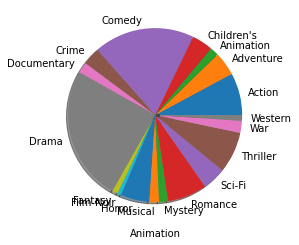

In [4]:
sns.barplot(x='Animation', data=movies, orient="h")

generes = []
for i in range(18):
    generes.append(movies.iloc[:,i+4].sum())
    
print(generes)

mylabels = ['Action', 'Adventure', 'Animation',
       'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western']

plt.pie(generes, labels=mylabels, shadow = True)

Text(0, 0.5, 'Nombre de pelis')

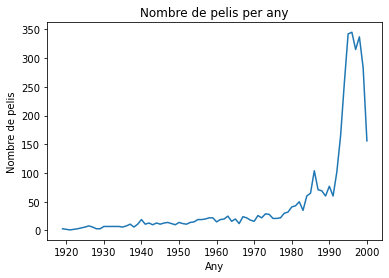

In [5]:
group = movies.groupby('Any')['numero'].sum().reset_index()

plt.plot(group['Any'],group['numero'])
plt.title('Nombre de pelis per any')
plt.xlabel('Any')
plt.ylabel('Nombre de pelis')

In [7]:
generes=['Action', 'Adventure', 'Animation',
       'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western']
df=pd.DataFrame(movies.groupby('Any')['Action'].sum().reset_index()['Any'].astype(int))
for i in generes:
    df[i]=movies.groupby('Any')[i].sum().reset_index()[i]
print(df)

     Any  Action  Adventure  Animation  Children's  Comedy  Crime  \
0   1919       1          1          0           0       1      0   
1   1920       0          0          0           0       2      0   
2   1921       1          0          0           0       0      0   
3   1922       0          0          0           0       0      0   
4   1923       0          0          0           0       2      0   
..   ...     ...        ...        ...         ...     ...    ...   
76  1996      37         22          7          20     115     23   
77  1997      43         22          6          22      98     26   
78  1998      44         16          8          18     112     25   
79  1999      27          7          7          11     103     12   
80  2000      19          6          8           9      69      8   

    Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  \
0             0      2        0          0       0        0        0        0   
1        

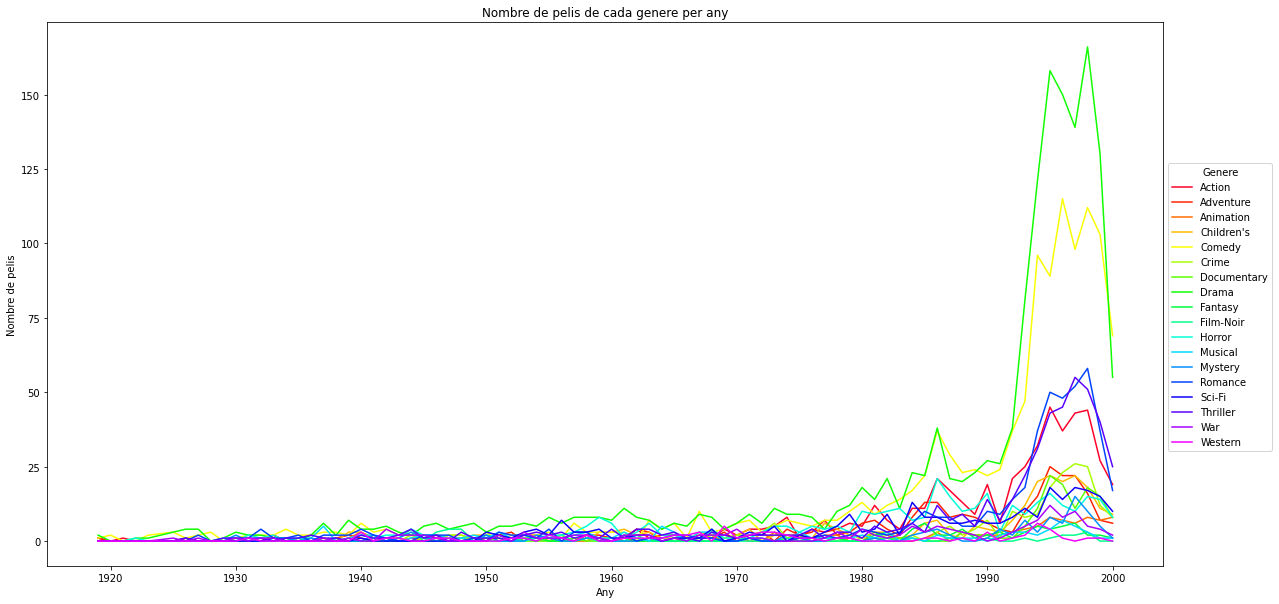

In [8]:
colors=[]
for j in range(18):
    colors.append(j)
plt.rcParams["figure.figsize"] = (20,10)
for i in range(18):
    plt.plot(df['Any'],df.iloc[:,i+1], color=plt.cm.gist_rainbow((i)/18),label=df.columns[i+1])

plt.title('Nombre de pelis de cada genere per any')
plt.xlabel('Any')
plt.ylabel('Nombre de pelis')
plt.legend(title='Genere',bbox_to_anchor=(1,0.75))

Text(0.5, 1.0, 'Pelis de ciència ficció al llarg del temps')

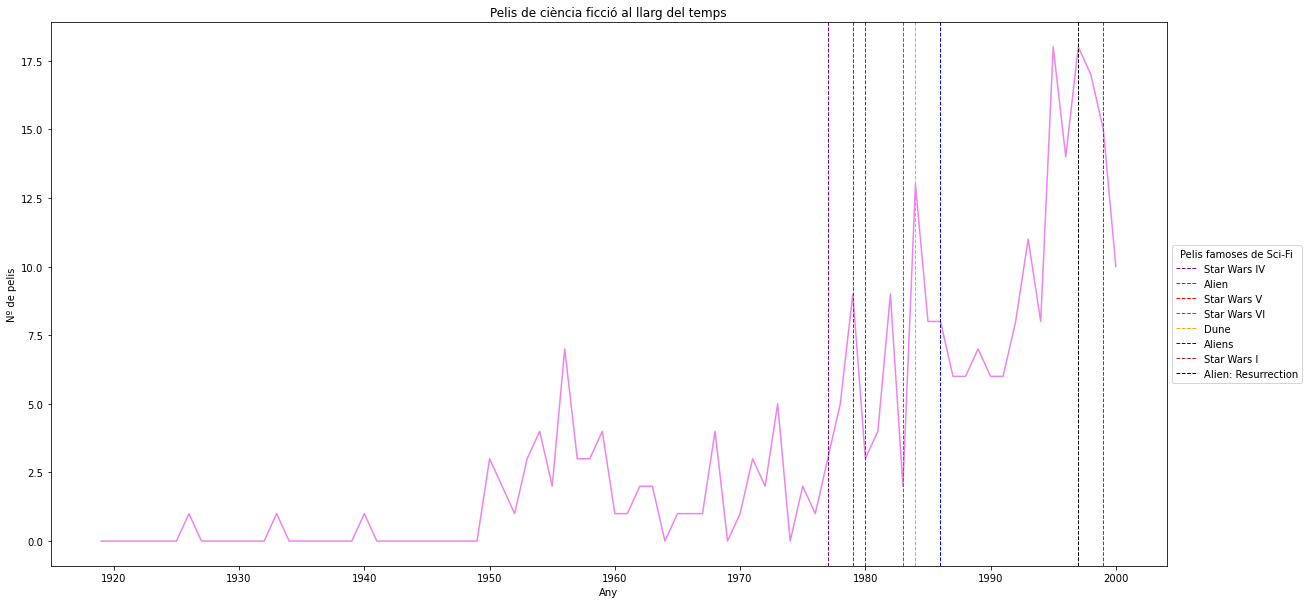

In [45]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(df['Any'],df['Sci-Fi'], color='violet')
plt.axvline(1977, color='purple', alpha=1, linestyle='dashed', linewidth=1, label='Star Wars IV')
plt.axvline(1979, color='green', alpha=1, linestyle='dashed', linewidth=1, label='Alien')
plt.axvline(1980, color='red', alpha=1, linestyle='dashed', linewidth=1, label='Star Wars V')
plt.axvline(1983, color='sienna', alpha=1, linestyle='dashed', linewidth=1, label = 'Star Wars VI')
plt.axvline(1984, color='orange', alpha=1, linestyle='dashed', linewidth=1, label = 'Dune')
plt.axvline(1986, color='blue', alpha=1, linestyle='dashed', linewidth=1, label = 'Aliens')
plt.axvline(1999, color='brown', alpha=1, linestyle='dashed', linewidth=1, label='Star Wars I')
plt.axvline(1997, color='black', alpha=1, linestyle='dashed', linewidth=1, label='Alien: Resurrection')
plt.legend(title='Pelis famoses de Sci-Fi',bbox_to_anchor=(1,0.6))
plt.xlabel('Any')
plt.ylabel('Nº de pelis')
plt.title('Pelis de ciència ficció al llarg del temps')

Text(0.5, 1.0, 'Pelis de terror al llarg del temps')

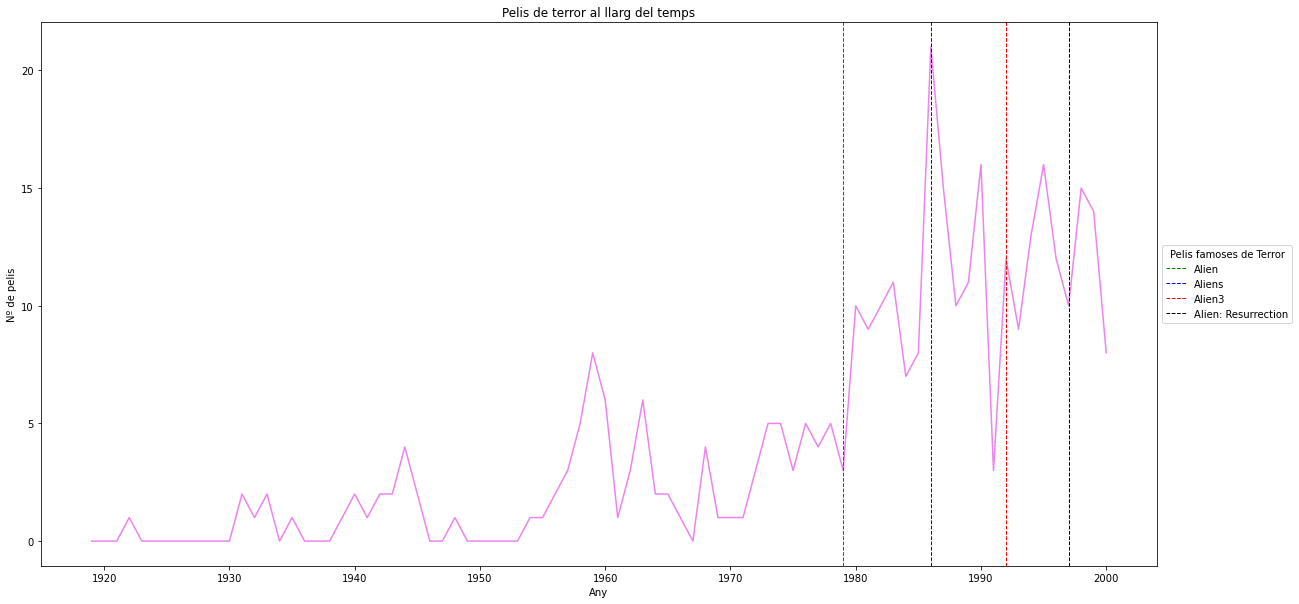

In [48]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(df['Any'],df['Horror'], color='violet')
plt.axvline(1979, color='green', alpha=1, linestyle='dashed', linewidth=1, label='Alien')
plt.axvline(1986, color='blue', alpha=1, linestyle='dashed', linewidth=1, label = 'Aliens')
plt.axvline(1992, color='red', alpha=1, linestyle='dashed', linewidth=1, label = 'Alien3')
plt.axvline(1997, color='black', alpha=1, linestyle='dashed', linewidth=1, label='Alien: Resurrection')
plt.legend(title='Pelis famoses de Terror',bbox_to_anchor=(1,0.6))
plt.xlabel('Any')
plt.ylabel('Nº de pelis')
plt.title('Pelis de terror al llarg del temps')

Text(0, 0.5, 'Nº de pelis')

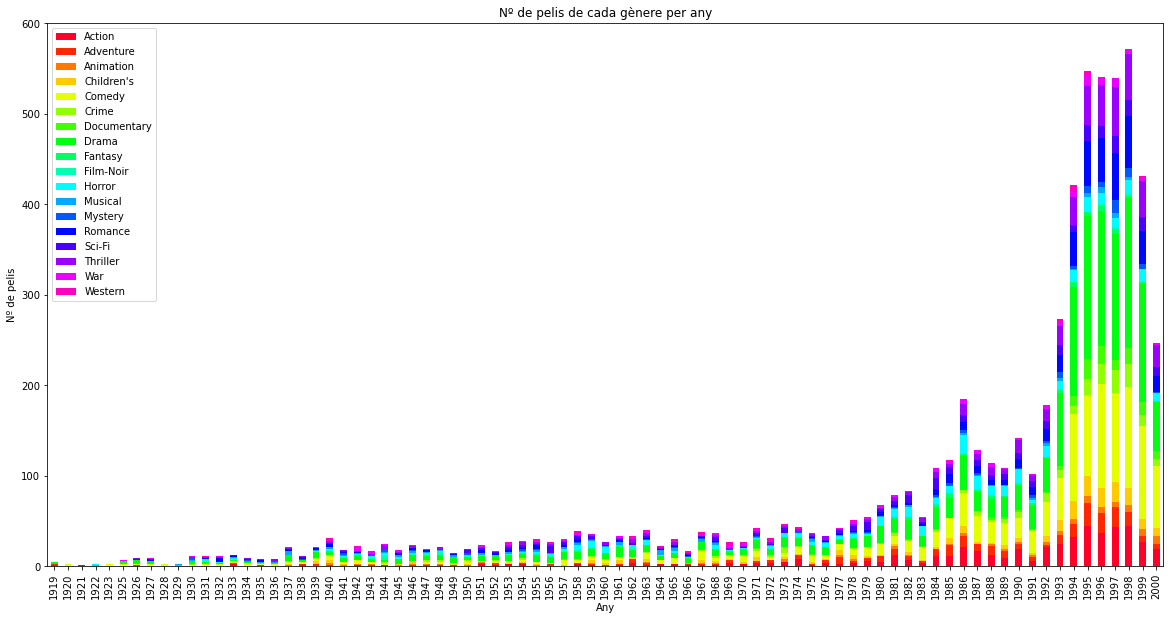

In [98]:
df.plot(x='Any',y=['Action', 'Adventure', 'Animation',
       'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'], stacked=True, kind='bar',cmap='gist_rainbow')
plt.title('Nº de pelis de cada gènere per any')
plt.xlabel('Any')
plt.ylabel('Nº de pelis')

In [10]:
print('Pelis de ciència ficció entre els anys 1950 i 1960')
movies.loc[(movies['Any']>=1950)&(movies['Any']<=1960)&(movies['Sci-Fi']==1)]

Pelis de ciència ficció entre els anys 1950 i 1960


,ID,Titol,Genere,Any,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,numero
1006,1019,"20,000 Leagues Under the Sea",Adventure|Children's|Fantasy|Sci-Fi,1954,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1233,1253,"Day the Earth Stood Still, The",Drama|Sci-Fi,1951,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1281,1301,Forbidden Planet,Sci-Fi,1956,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1314,1334,"Blob, The",Horror|Sci-Fi,1958,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1855,1924,Plan 9 from Outer Space,Horror|Sci-Fi,1958,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2218,2287,Them!,Sci-Fi|Thriller|War,1954,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,1
2294,2363,Godzilla (Gojira),Action|Sci-Fi,1954,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2385,2454,"Fly, The",Horror|Sci-Fi,1958,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2484,2553,Village of the Damned,Horror|Sci-Fi|Thriller,1960,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
2587,2656,Tarantula,Horror|Sci-Fi,1955,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [63]:
print('Pelis de ciència ficció i terror')
movies.loc[(movies['Horror']==1)&(movies['Sci-Fi']==1)]

Pelis de ciència ficció i terror


,ID,Titol,Genere,Any,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,numero
194,196,Species,Horror|Sci-Fi,1995,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
328,332,Village of the Damned,Horror|Sci-Fi,1995,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
422,426,Body Snatchers,Horror|Sci-Fi|Thriller,1993,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
508,512,Robert A. Heinlein's The Puppet Masters,Horror|Sci-Fi,1994,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
606,610,Heavy Metal,Action|Adventure|Animation|Horror|Sci-Fi,1981,1,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
607,611,Hellraiser: Bloodline,Action|Horror|Sci-Fi,1996,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
956,968,Night of the Living Dead,Horror|Sci-Fi,1968,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1196,1214,Alien,Action|Horror|Sci-Fi|Thriller,1979,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
1197,1215,Army of Darkness,Action|Adventure|Comedy|Horror|Sci-Fi,1993,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1300,1320,Alienï¿½,Action|Horror|Sci-Fi|Thriller,1992,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1


Text(0, 0.5, 'Nº de pel·lícules')

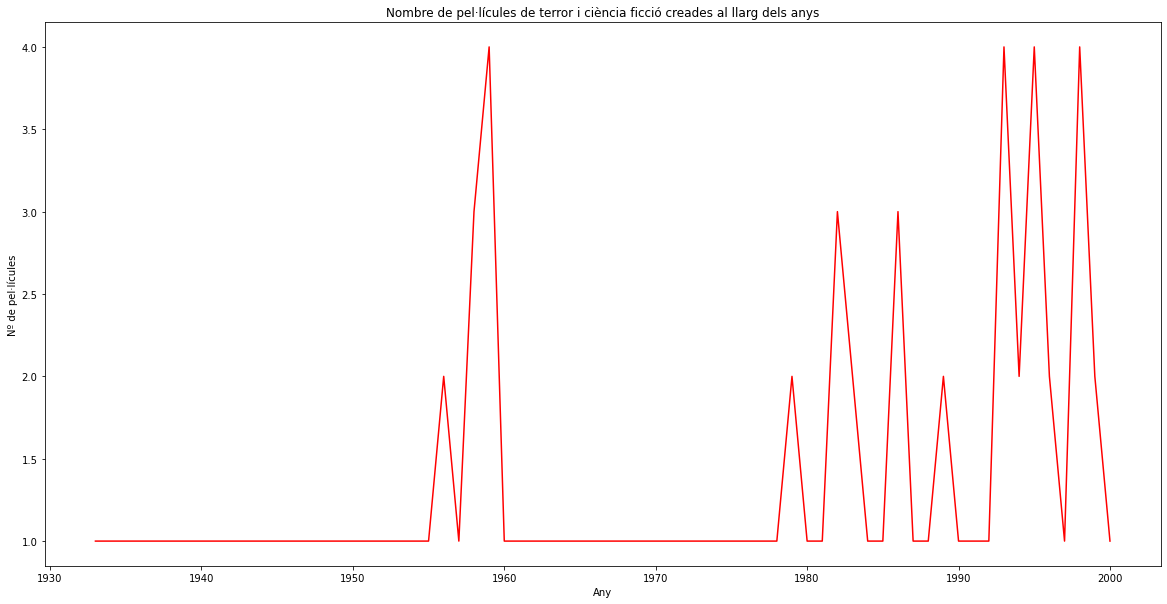

In [74]:
df3=pd.DataFrame(movies.loc[(movies['Sci-Fi']==1)&(movies['Horror']==1)].reset_index()['Any'])
df3['numero']=1
group=df3.groupby('Any')['numero'].sum().reset_index()
group.plot(x='Any',y='numero',legend=None,c='r')
plt.title('Nombre de pel·lícules de terror i ciència ficció creades al llarg dels anys',loc='center')
plt.xlabel('Any')
plt.ylabel('Nº de pel·lícules')

Text(0, 0.5, 'Nº de pelis produïdes cada any')

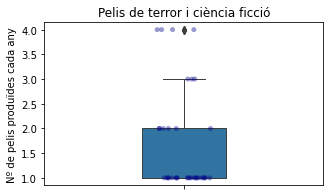

In [100]:
plt.rcParams["figure.figsize"] = (5,3)
plt.title('Pelis de terror i ciència ficció')
sns.boxplot(y='numero', hue='Any', data=group, fliersize=5,  orient='v', linewidth=1 , width=0.3)
sns.stripplot(y='numero', hue='Any', data=group, orient='v', color='darkblue', alpha= 0.4)
plt.ylabel('Nº de pelis produïdes cada any')

Text(0, 0.5, 'Nº de pel·lícules per any')

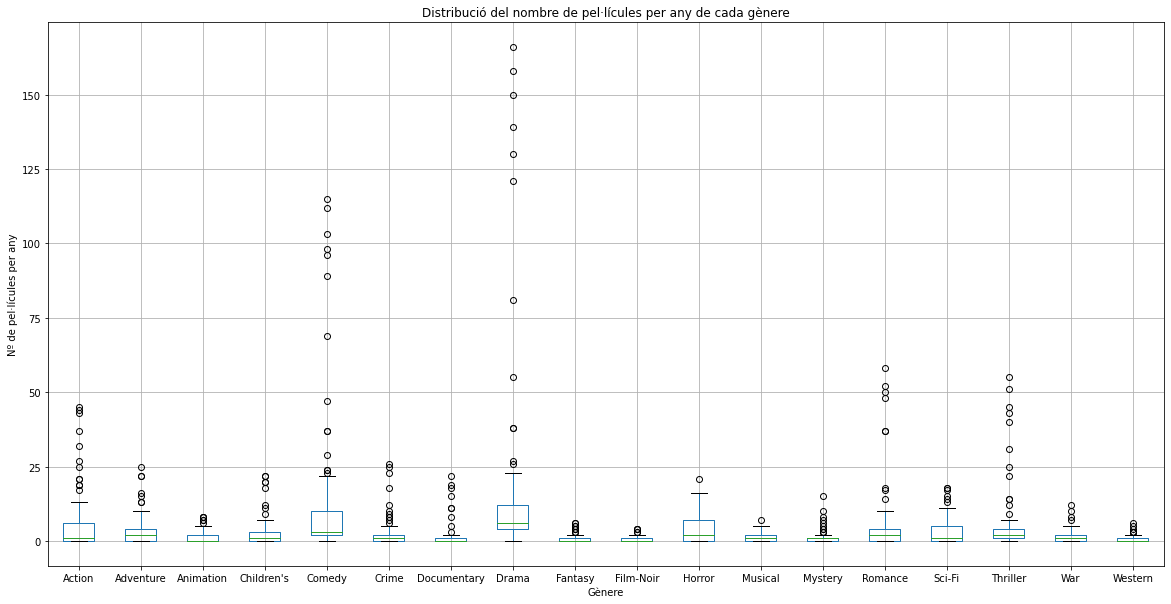

In [101]:
plt.rcParams["figure.figsize"] = (20,10)
df2 = pd.DataFrame(data = df, columns =['Action', 'Adventure', 'Animation',
       'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'])
df2.boxplot()
plt.title('Distribució del nombre de pel·lícules per any de cada gènere')
plt.xlabel('Gènere')
plt.ylabel('Nº de pel·lícules per any')
#print(df2)